In [23]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
df = pd.read_csv('savegame.csv')

In [24]:
all_names = pd.concat([df["player1"], df["player2"]], ignore_index=True).unique().tolist()
draw_games = df[df['draw']]
stats = pd.DataFrame({
    'Player Name': all_names,
    'Games': [((df['player1'] == name) | (df['player2'] == name)).sum() for name in all_names],
    'Wins': [(df['winner'] == name).sum() for name in all_names],
    'Draws': [((draw_games['player1'] == name) | (draw_games['player2'] == name)).sum() for name in all_names],
})
stats['winning_rate'] = stats['Wins'] / stats['Games']
stats['drawing_rate'] = stats['Draws'] / stats['Games']
stats

,Player Name,Games,Wins,Draws,winning_rate,drawing_rate
0,yining,6,2,1,0.333333,0.166667
1,lyn,5,0,3,0.000000,0.600000
2,roim,2,0,0,0.000000,0.000000
3,Computer,7,5,2,0.714286,0.285714


# Showing how many games each player has won

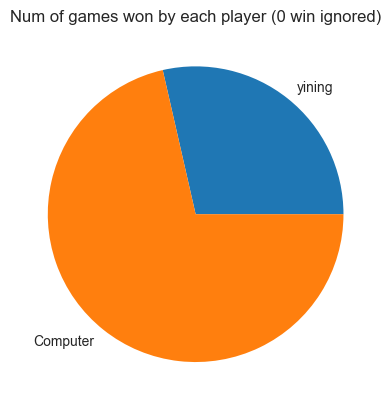

In [25]:
import numpy as np
fig, ax = plt.subplots()
names, wins = [], []
for i, r in stats.iterrows():
    if r['Wins'] > 0:
        names.append(r['Player Name'])
        wins.append(r['Wins'])
ax.pie(wins, labels=names)

ax.set_title('Num of games won by each player (0 win ignored)')

plt.show()

# Comparing each player's winning rate

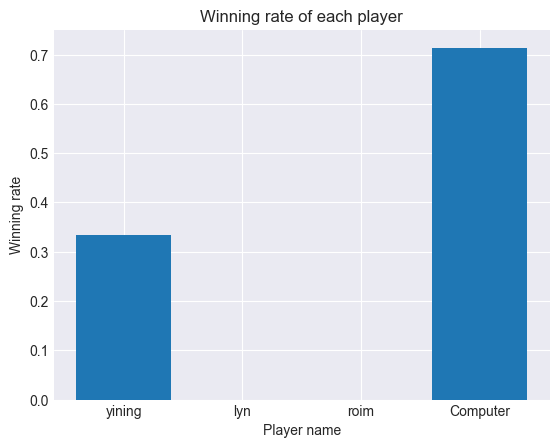

In [26]:
import numpy as np
fig, ax = plt.subplots()
ax.bar(stats['Player Name'], stats['winning_rate'].tolist())

ax.set_ylabel('Winning rate')
ax.set_xlabel('Player name')
ax.set_title('Winning rate of each player')

plt.show()

# Showing the winning rate change of Computer

Text(0.5, 1.0, "Winning rates' change during the play of Computer")

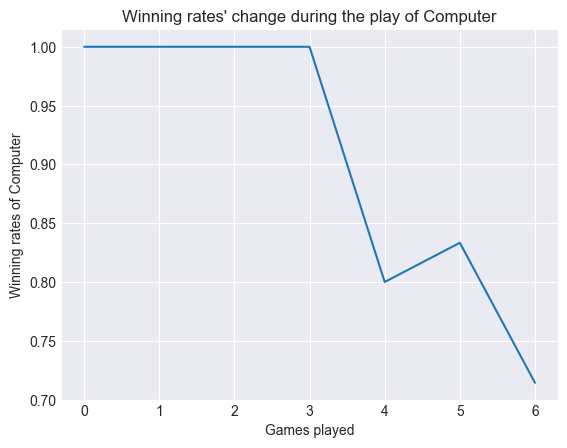

In [27]:
df = df[(df['player1'] =='Computer') | (df['player2'] =='Computer')]
winning_rates = []
played = 0
won = 0
winners = df['winner'].tolist()
for w in winners:
    played += 1
    if w == 'Computer':
        won += 1
    winning_rates.append(won / played)
fig, ax = plt.subplots()
ax.plot(winning_rates)
ax.set_xlabel("Games played")
ax.set_ylabel("Winning rates of Computer")
ax.set_title("Winning rates' change during the play of Computer")